In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/Apaulgithub/oibsip_taskno5/main/Advertising.csv")

In [13]:
df .head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [15]:
print("Number of rows are:",df.shape[0])
print("Number of columns are:",df.shape[1])

Number of rows are: 200
Number of columns are: 5


In [17]:
df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [19]:
dup = df.duplicated().sum()
print(f' number of duplicated rows are {dup}')

 number of duplicated rows are 0


In [21]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [23]:
df .columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [25]:
df.describe(include='all').round(2)

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00,200.00
mean,100.50,147.04,23.26,30.55,14.02
std,57.88,85.85,14.85,21.78,5.22
min,1.00,0.70,0.00,0.30,1.60
25%,50.75,74.38,9.98,12.75,10.38
50%,100.50,149.75,22.90,25.75,12.90
75%,150.25,218.82,36.52,45.10,17.40
max,200.00,296.40,49.60,114.00,27.00


In [27]:
for i in df.columns.tolist():
    print("No of unique values in",i,"is",df[i].nunique())

No of unique values in Unnamed: 0 is 200
No of unique values in TV is 190
No of unique values in Radio is 167
No of unique values in Newspaper is 172
No of unique values in Sales is 121


In [35]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [37]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


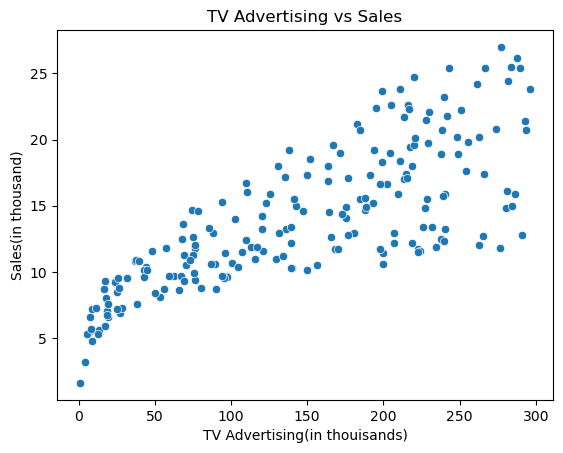

In [49]:
sns.scatterplot(x='TV',y='Sales',data=df)
plt.title("TV Advertising vs Sales")
plt.xlabel("TV Advertising(in thouisands)")
plt.ylabel("Sales(in thousand)")
plt.show()

In [53]:
from sklearn.model_selection import train_test_split

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
slope = model.coef_[0]
intercept = model.intercept_
print(f"Linear Regression Equation: Sales = {intercept:.2f} + {slope:.2f} * TV")

Linear Regression Equation: Sales = 2.98 + 0.04 * TV


In [65]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 3.17
R² Score: 0.90


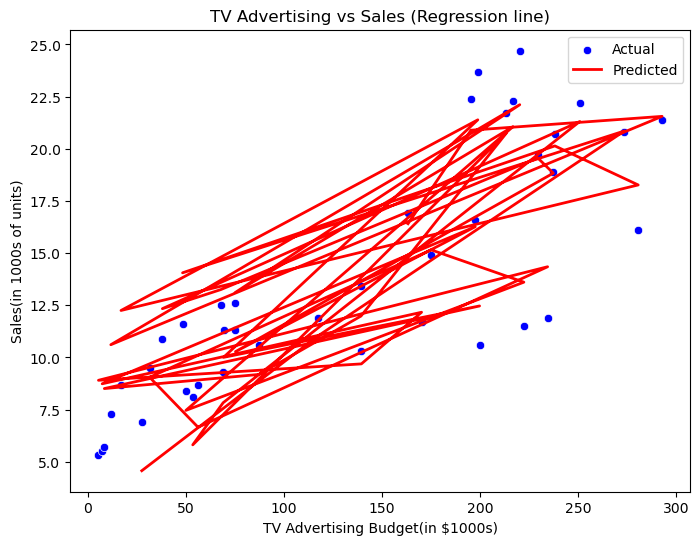

In [67]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test['TV'],y=y_test,color='blue',label='Actual')
plt.plot(X_test['TV'],y_pred,color='red',linewidth=2, label='Predicted')
plt.title('TV Advertising vs Sales (Regression line)')
plt.xlabel('TV Advertising Budget(in $1000s)')
plt.ylabel('Sales(in 1000s of units)')
plt.legend()

In [69]:
plt.show()